# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], 
              axis = 1, 
              inplace = True)
    print("Wholesale customers dataset has {} samples with {} features each.".format(*data.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
data.describe()

Fresh          Milk       Grocery        Frozen  \
count     440.000000    440.000000    440.000000    440.000000   
mean    12000.297727   5796.265909   7951.277273   3071.931818   
std     12647.328865   7380.377175   9503.162829   4854.673333   
min         3.000000     55.000000      3.000000     25.000000   
25%      3127.750000   1533.000000   2153.000000    742.250000   
50%      8504.000000   3627.000000   4755.500000   1526.000000   
75%     16933.750000   7190.250000  10655.750000   3554.250000   
max    112151.000000  73498.000000  92780.000000  60869.000000   

       Detergents_Paper  Delicatessen  
count        440.000000    440.000000  
mean        2881.493182   1524.870455  
std         4767.854448   2820.105937  
min            3.000000      3.000000  
25%          256.750000    408.250000  
50%          816.500000    965.500000  
75%         3922.000000   1820.250000  
max        40827.000000  47943.000000

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [3]:
# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [23, 412, 436]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], 
                       columns = data.keys()).reset_index(drop=True)

print("Chosen samples of wholesale customers dataset:")
display(samples)

Chosen samples of wholesale customers dataset:


Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  26373  36423    22019    5154              4337         16523
1     97   3605    12400      98              2970            62
2  39228   1431      764    4510                93          2346

### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  

* What kind of establishment (customer) could each of the three samples you've chosen represent?

**Hint:** Examples of establishments include places like markets, cafes, delis, wholesale retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant. You can use the mean values for reference to compare your samples with. The mean values are as follows:

* Fresh: 12000.2977
* Milk: 5796.2
* Grocery: 7951.3
* Detergents_paper: 2881.4
* Delicatessen: 1524.8

Knowing this, how do your samples compare? Does that help in driving your insight into what kind of establishments they might be? 


**Answer:**

1. **Very big market, supermarket (such as Whole Foods, U.S.):**
    * For this type of market, they need motly a huge amount of goods in each and every fields of product (from meat, frozen items, to grocery and detergent papers) in order to serve widely range of customers. 
    * That's why they for this datapoints, all of the six categoties values are high in number compared to other data records, and much higher than the mean of this dataset.
2. **Small to medium grocery (such as Guardian in Singapore):**
    * For these grocery stores, they only need to supply items for grocery purposes. Those products for **Fresh**, **Frozen** or **Delicatessen** are not meant to sell here for people who just want to get items for their house instead of foods or drinks.
    * We can see the amount for **Fresh**, **Frozen** or **Delicatessen** are too little compared to the milk and grocery items, and only the grocery amount is higher than the mean of dataset.
3. **Market that only focuses on Fresh:**
    * For some stores, they only focus on selling **Fresh** as main products, and also provide some other categories such as **frozen** and **delicatessen**, which are more likely made from their **Fresh** products. And obviously not for grovery products.
    * Even the **Fresh** amount really dominates the other categories, also much higher than the mean for **Fresh**. **Frozen** and **delicatessen** are also high in value, which makes sense in this case since their **Fresh** products could be used for these categories, and more likely their customers will choose these categories as well.


### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor


# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
given_feature = data.Frozen
new_data = data.drop('Frozen', axis=1)


# TODO: Split the data into training and testing sets(0.25) using the given feature as the target
# Set a random state.
X_train, X_test, y_train, y_test = train_test_split(new_data,
                                                    given_feature,
                                                    test_size=0.25, 
                                                    random_state=42)

# TODO: Create a decision tree regressor and fit it to the training set
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)

print("%.4f" % score)


-0.2101


### Question 2

* Which feature did you attempt to predict? 
* What was the reported prediction score? 
* Is this feature necessary for identifying customers' spending habits?

**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data. If you get a low score for a particular feature, that lends us to beleive that that feature point is hard to predict using the other features, thereby making it an important feature to consider when considering relevance.

**Answer:**

* I intended to predict the **Frozen** feature as I want to verify whether it can be affected by the **Fresh** amount or not. 
* Interestingly, the **R^2** score was **-0.1251**, a negative number.
* In this case, the model fails to fit the data. Since this feature point is hard to predict using other features, it is not necessary for identifying customers' spending habits. For example, if **Frozen** value is high, it does not mean **Fresh** is also high. Could be both high or low.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

/Users/khang.vu/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


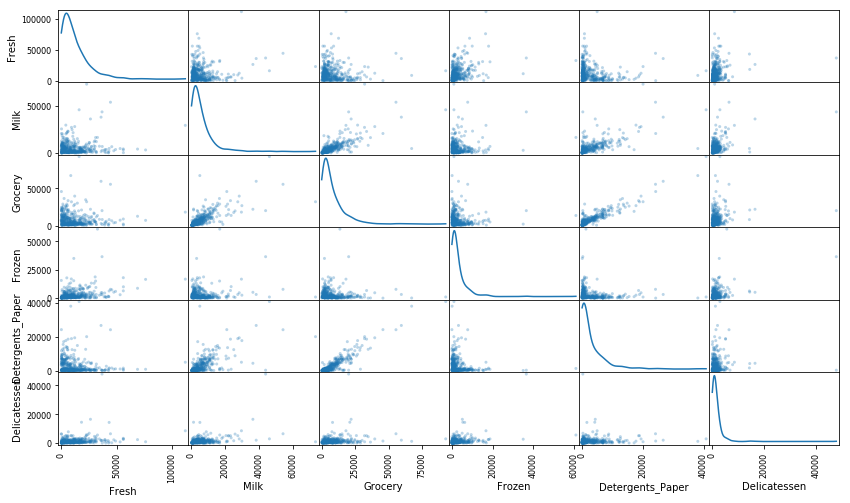

In [5]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

# Heatmap
# import seaborn as sns; sns.set()
# corr_data = data.corr()

# ax = sns.heatmap(corr_data, center=0, vmax=1, vmin=-1)

### Question 3
* Using the scatter matrix as a reference, discuss the distribution of the dataset, specifically talk about the normality, outliers, large number of data points near 0 among others. If you need to sepearate out some of the plots individually to further accentuate your point, you may do so as well.
* Are there any pairs of features which exhibit some degree of correlation? 
* Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? 
* How is the data for those features distributed?

**Hint:** Is the data normally distributed? Where do most of the data points lie? You can use [corr()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) to get the feature correlations and then visualize them using a [heatmap](http://seaborn.pydata.org/generated/seaborn.heatmap.html)(the data that would be fed into the heatmap would be the correlation values, for eg: `data.corr()`) to gain further insight.

**Answer:**

1. As seen on the scatter matrix, the distributions in this dataset are mostly focused near around the original point (0, 0), for most of the feature pairs. And there are quite a lot of outliers far to the right from the most densed area of each distribution.

2. Based on the graphs, the pairs of **Milk - Grocery** and **Milk - Detergents_paper** look more like they have good correlations between each other. Seems like we can fit a straight line there for regression analysis. This can be proved after mapping out the heatmap from seaborn library, where these two pairs of feature have large correlation coefficients (close to 1.0).

3. Based on the heatmap and the matrix, I can say that this result kind of denies my suspicions about the **Frozen** feature.

4. I thought that **Fresh - Frozen** could be correlated somehow, but looks like the distribution shows that a high amount of **Fresh** value could be associated with either high or low **Frozen** value. The data for this feature pair is mostly distributed around near the origin. Even though they look like correlated "a little" upwards, but still not clear in this case. This can be observed in the heatmap as well, with purple color (around 0.4, not as high as **Milk, Grocery, and Detergents_paper**, but not as low as the other pairs).

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying logarithmic scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying logarithmic scaling. Again, use `np.log`.

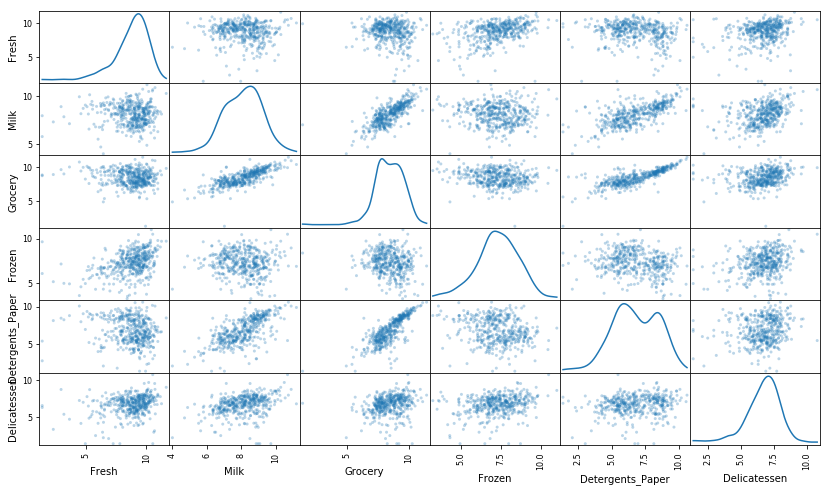

In [6]:
# TODO: Scale the data using the natural logarithm
log_data = data.apply(lambda x: np.log(x + 1))

# TODO: Scale the sample data using the natural logarithm
log_samples = samples.apply(lambda x: np.log(x + 1))

# Produce a scatter matrix for each pair of newly-transformed features
pd.plotting.scatter_matrix(log_data, 
                           alpha = 0.3,
                           figsize = (14,8),
                           diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [7]:
# Display the log-transformed sample data
display(log_samples)

Fresh       Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
0  10.180134  10.502983  9.999706  8.547722          8.375169      9.712569
1   4.584967   8.190354  9.425532  4.595120          7.996654      4.143135
2  10.577172   7.266827  6.639876  8.414274          4.543295      7.760893

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [8]:
display(log_data.describe())

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
# OPTIONAL: Select the indices for data points you wish to remove
outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Fresh        Milk     Grocery      Frozen  Detergents_Paper  \
count  440.000000  440.000000  440.000000  440.000000        440.000000   
mean     8.732813    8.121615    8.442205    7.303128          6.791781   
std      1.470618    1.080635    1.111523    1.281888          1.709519   
min      1.386294    4.025352    1.386294    3.258097          1.386294   
25%      8.048378    7.335633    7.675081    6.611024          5.551989   
50%      9.048404    8.196435    8.467267    7.331043          6.706242   
75%      9.737123    8.880619    9.273948    8.176177          8.274596   
max     11.627610   11.205027   11.437997   11.016496         10.617123   

       Delicatessen  
count    440.000000  
mean       6.671094  
std        1.293960  
min        1.386294  
25%        6.014321  
50%        6.873680  
75%        7.507278  
max       10.777789

Data points considered outliers for the feature 'Fresh':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
65   4.454347   9.950371  10.732672  3.610918         10.095429      7.261225
66   2.302585   7.336286   8.911665  5.170484          8.151622      3.332205
81   5.393628   9.163354   9.575261  5.648974          8.964312      5.056246
95   1.386294   7.979681   8.740817  6.089045          5.411646      6.565265
96   3.178054   7.869784   9.001962  4.983607          8.262301      5.384495
128  4.948760   9.087947   8.249052  4.962845          6.968850      1.386294
171  5.303305  10.160569   9.894295  6.480045          9.079548      8.740497
193  5.198497   8.156510   9.918031  6.866933          8.633909      6.502790
218  2.944439   8.923325   9.629445  7.159292          8.475954      8.759826
304  5.087596   8.917445  10.117550  6.426488          9.374498      7.787797
305  5.497168   9.468079   9.088512  6.684612          8.271293      5.356586
338  1.386294   5.811141   8.856803  9.655154          2.772589      6.311735
353  4.770685   8.742734   9.961945  5.433722          9.069122      7.013915
355  5.252273   6.590301   7.607381  5.505332          5.220356      4.852030
357  3.637586   7.151485  10.011130  4.927254          8.817001      4.709530
412  4.584967   8.190354   9.425532  4.595120          7.996654      4.143135

Data points considered outliers for the feature 'Milk':


Fresh       Milk    Grocery    Frozen  Detergents_Paper  Delicatessen
86   10.040027  11.205027  10.377078  6.895683          9.907031      6.806829
98    6.222576   4.727388   6.658011  6.797940          4.043051      4.890349
154   6.434547   4.025352   4.927254  4.330733          2.079442      2.197225
356  10.029547   4.905275   5.389072  8.057694          2.302585      6.308098

Data points considered outliers for the feature 'Grocery':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
154  6.434547  4.025352  4.927254  4.330733          2.079442      2.197225

Data points considered outliers for the feature 'Frozen':


Fresh      Milk    Grocery     Frozen  Detergents_Paper  Delicatessen
38    8.432071  9.663325   9.723763   3.526361          8.847504      6.073045
57    8.597482  9.203718   9.257987   3.663562          8.932345      7.156956
65    4.454347  9.950371  10.732672   3.610918         10.095429      7.261225
145  10.000614  9.034200  10.457171   3.761200          9.440817      8.396381
175   7.759614  8.967759   9.382191   3.970292          8.342125      7.437206
264   6.979145  9.177817   9.645105   4.127134          8.696343      7.143618
325  10.395681  9.728241   9.519808  11.016496          7.149132      8.632306
420   8.402231  8.569216   9.490091   3.258097          8.827468      7.239933
429   9.060447  7.467942   8.183397   3.871201          4.442651      7.824846
439   7.933080  7.437795   7.828436   4.189655          6.169611      3.970292

Data points considered outliers for the feature 'Detergents_Paper':


Fresh      Milk   Grocery    Frozen  Detergents_Paper  Delicatessen
75   9.923241  7.037028  1.386294  8.391176          1.386294      6.883463
161  9.428270  6.293419  5.648974  6.996681          1.386294      7.711549

Data points considered outliers for the feature 'Delicatessen':


Fresh       Milk    Grocery     Frozen  Detergents_Paper  \
66    2.302585   7.336286   8.911665   5.170484          8.151622   
109   7.249215   9.724959  10.274603   6.513230          6.729824   
128   4.948760   9.087947   8.249052   4.962845          6.968850   
137   8.035279   8.997271   9.021961   6.495266          6.582025   
142  10.519673   8.875287   9.018453   8.005033          3.044522   
154   6.434547   4.025352   4.927254   4.330733          2.079442   
183  10.514557  10.690831   9.912001  10.506026          5.480639   
184   5.793014   6.823286   8.457655   4.317488          5.814131   
187   7.799343   8.987572   9.192176   8.743532          8.149024   
203   6.369901   6.530878   7.703910   6.152733          6.861711   
233   6.872128   8.514189   8.106816   6.843750          6.016157   
285  10.602989   6.463029   8.188967   6.949856          6.079933   
289  10.663990   5.659482   6.156979   7.236339          3.496508   
343   7.432484   8.848653  10.177970   7.284135          9.646658   

     Delicatessen  
66       3.332205  
109      1.386294  
128      1.386294  
137      3.610918  
142      1.386294  
154      2.197225  
183     10.777789  
184      2.484907  
187      1.386294  
203      2.944439  
233      2.079442  
285      2.944439  
289      3.135494  
343      3.637586

### Question 4
* Are there any data points considered outliers for more than one feature based on the definition above? 
* Should these data points be removed from the dataset? 
* If any data points were added to the `outliers` list to be removed, explain why.

** Hint: ** If you have datapoints that are outliers in multiple categories think about why that may be and if they warrant removal. Also note how k-means is affected by outliers and whether or not this plays a factor in your analysis of whether or not to remove them.

**Answer:**

* Yes, for points like: **86 (10.040027	11.205027	10.377078	6.895683	9.907031	6.806829)**, or **183 (10.514557	10.690831	9.912001	10.506026	5.480639	10.777789)** with features **(Fresh	Milk	Grocery	Frozen	Detergents_Paper	Delicatessen)** respectively. We can see that these points have multiple features which exceed the **75%** of the data and very close to **Max** already. It makes sense for us to remove those points because they are too far from the **Mean** value.

* I did not include any points in the *outliers* array because it's optional. However, I do agree that data points with more than one feature, which are considered as "outlier feature", need to be removed because they will affect the place where the centroid from KMeans in order to cover these outliers as well (if we decide to cluster them using KMeans).

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

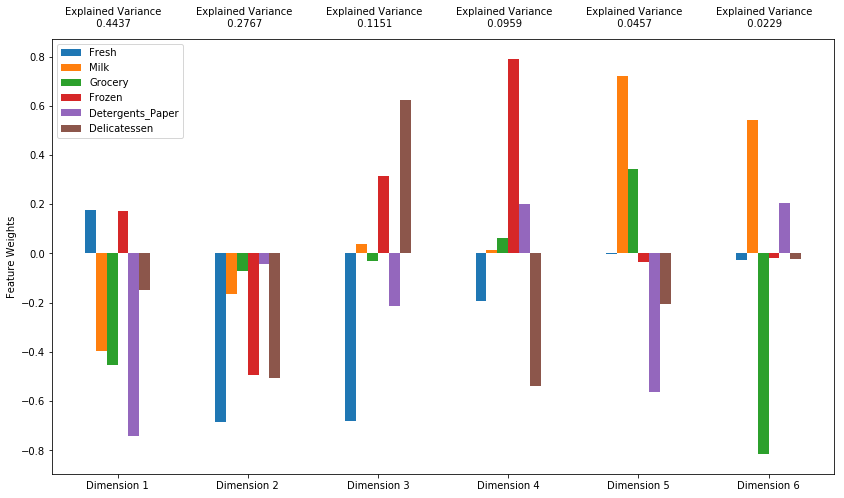

In [9]:
from sklearn.decomposition import PCA

# TODO: Apply PCA by fitting the good data with the same number of dimensions as features
n_features = good_data.shape[1]
pca = PCA(n_components=n_features, whiten=True).fit(good_data)


# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = vs.pca_results(good_data, pca)

### Question 5

* How much variance in the data is explained* **in total** *by the first and second principal component? 
* How much variance in the data is explained by the first four principal components? 
* Using the visualization provided above, talk about each dimension and the cumulative variance explained by each, stressing upon which features are well represented by each dimension(both in terms of positive and negative variance explained). Discuss what the first four dimensions best represent in terms of customer spending.

**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the individual feature weights.

**Answer:**

1. Total for explained variance in the data for the first two PCs is **0.7204** by **0.4437 + 0.2767** respectively.
2. Total for explained variance in the data for the first four PCs is **0.9314** by **0.4437 + 0.2767 + 0.1151 + 0.0959**, respectively.

3. The *first dimension* has the largest explained variance here, with each features having their own amount of weights. These weights (both positives and negatives) are not too small (insignificant) in this case. Which means they have big impacts. **Detergents_paper** is the one feature with largest weight, and **Delicatessen** is smallest. Since we only have one dimension so far, the cummulative explained variance is, hence, the same as this dimension. Note that the three features **Milk, Grocery, and Detergents_paper** are dominating the total weights which represent this dimension.

4. *Second dimension* also has large explained variance. However, none of the features are positive anymore. And this time, **Milk, Grocery and Detergents_paper** are no longer dominating the cummulative variance, while the rest of the features increase their weights towards the negative side and these features mostly represent this variance for this dimension.

5. *Third dimension* still has the same domination from **Fresh, Frozen, and Delicatessen**. However, the cummulative variance becomes smaller than previous dimension because of decreasing in other features. One another notice is that **Milk, Frozen, and Delicatessen** increased their weights towards the positive side this time.

6. *Fourth dimension* decrease the cummulative variance again. This time, we notice a total domination from **Frozen and Delicatessen** and a little bit from **Fresh and Detergents_paper**. Note that this time, just like in the 3rd dimension, **Milk and Grocery** weights are very close to 0.

7. *Fifth dimension* decreases the cummulative variance even more, even though each of the features seem to have a big change towards both sides this time.

8. *Sixth dimension*, now we clearly see that only **Milk, Grocery, and Detergents_paper** represents the PC. The other features are mostly insignificant.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [10]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

Dimension 1  Dimension 2  Dimension 3  Dimension 4  Dimension 5  \
0      -1.2828      -2.1489       0.9090      -0.4813       0.9954   
1      -1.0033       3.0719       0.0932       0.3251       0.4569   
2       1.4553      -1.1497       0.2490      -0.6329      -0.3319   

   Dimension 6  
0       0.4238  
1      -0.5990  
2       0.9108

### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [11]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2, whiten=True).fit(good_data)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(good_data)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

In [12]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

Dimension 1  Dimension 2
0      -1.2828      -2.1489
1      -1.0033       3.0719
2       1.4553      -1.1497

## Visualizing a Biplot
A biplot is a scatterplot where each data point is represented by its scores along the principal components. The axes are the principal components (in this case `Dimension 1` and `Dimension 2`). In addition, the biplot shows the projection of the original features along the components. A biplot can help us interpret the reduced dimensions of the data, and discover relationships between the principal components and original features.

Run the code cell below to produce a biplot of the reduced-dimension data.

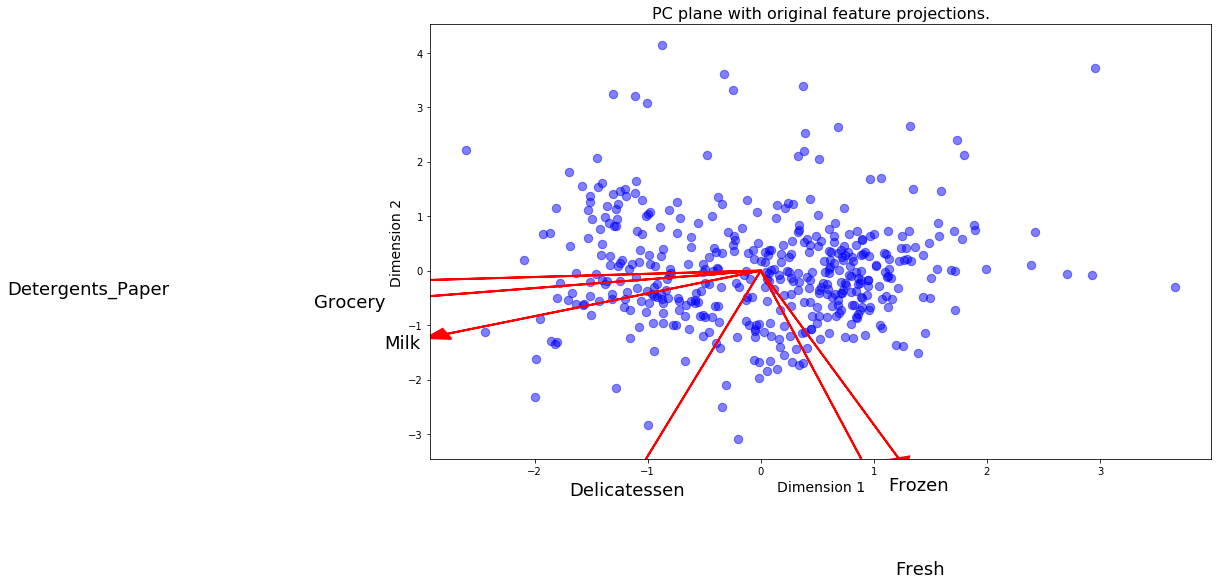

In [13]:
# Create a biplot
vs.biplot(good_data, reduced_data, pca)

### Observation

Once we have the original feature projections (in red), it is easier to interpret the relative position of each data point in the scatterplot. For instance, a point the lower right corner of the figure will likely correspond to a customer that spends a lot on `'Milk'`, `'Grocery'` and `'Detergents_Paper'`, but not so much on the other product categories. 

From the biplot, which of the original features are most strongly correlated with the first component? What about those that are associated with the second component? Do these observations agree with the pca_results plot you obtained earlier?

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6

* What are the advantages to using a K-Means clustering algorithm? 
* What are the advantages to using a Gaussian Mixture Model clustering algorithm? 
* Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?

** Hint: ** Think about the differences between hard clustering and soft clustering and which would be appropriate for our dataset.

**Answer:**

1. K-Means advantages: 
    * When we have a large number of variables, KMeans can be computationally faster than other hierarchical clustering, given K is small.
    * It can produces higher and tighter clusters than hierarchical clustering.
2. GMM (Gaussian Mixture Model):
    * GMM is a soft clustering algorithm - "Expectation", which means each datapoints could be a member of different clusters by calculating assigned membership number.
    * The clusters have flexible shapes to cover different distribution shape of data (e.g. cluster contains another clusters or change to elipse shape by using covariance parameter).
3. I will choose KMeans for this problem, because:
    * It is a hard clustering algorithm. That means we can try to look at one feature and knows exactly which cluster it belongs to. For example, if customer spends a lot on **Milk, Grocery or Detergents_paper**, we can cluster them into *market*.
    * Since we want to cluster out the group of features where we can make use to predict what the intention for each customers, it's better to group them and cluster them in a "hard" way to make sure they only belong to clustered group.
    
Reference:
* [KMeans advantages](http://stp.lingfil.uu.se/~santinim/ml/2016/Lect_10/10c_UnsupervisedMethods.pdf)
* [Soft, hard clustering](https://sandipanweb.wordpress.com/2017/03/19/hard-soft-clustering-with-k-means-weighted-k-means-and-gmm-em/)
* Lecture videos

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import `sklearn.metrics.silhouette_score` and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [68]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# TODO: Apply your clustering algorithm of choice to the reduced data 
params = dict(
    n_clusters=3
)
clusterer = KMeans(**params).fit(reduced_data)

# TODO: Predict the cluster for each data point
preds = clusterer.predict(reduced_data)

# TODO: Find the cluster centers
centers = clusterer.cluster_centers_

# TODO: Predict the cluster for each transformed sample data point
sample_preds = clusterer.predict(pca_samples)

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data, preds)

### Question 7

* Report the silhouette score for several cluster numbers you tried. 
* Of these, which number of clusters has the best silhouette score?

**Answer:**

* Cluster numbers: 2 - 0.3748
* **Cluster numbers: 3 - 0.3864**
* Cluster numbers: 4 - 0.3434
* Cluster numbers: 5 - 0.3684
* Cluster numbers: 6 - 0.3530

==> Best number of clusters: 3

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

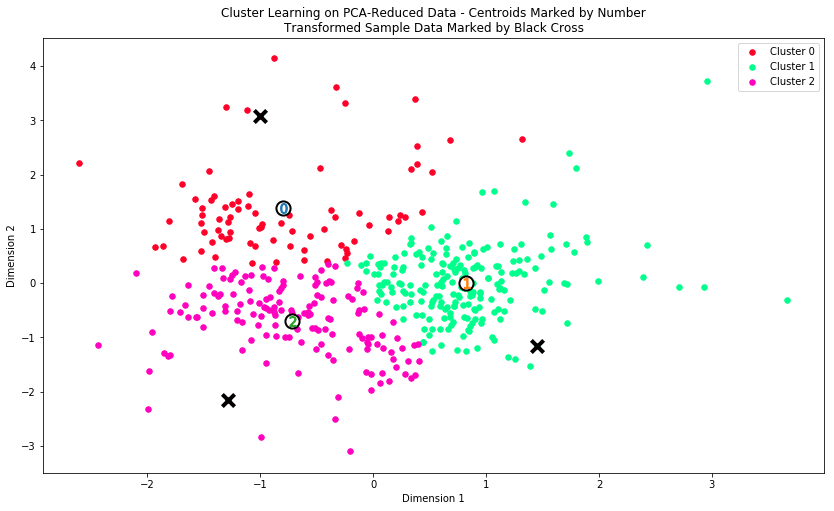

In [48]:
# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [60]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0, len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns=data.keys())
true_centers.index = segments

display(true_centers, data.mean())

Fresh    Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
Segment 0    897.0  4528.0   8616.0   340.0            2933.0         308.0
Segment 1   8501.0  1646.0   2042.0  2029.0             233.0         603.0
Segment 2  10812.0  7692.0  10375.0  2055.0            3028.0        1842.0

Fresh               12000.297727
Milk                 5796.265909
Grocery              7951.277273
Frozen               3071.931818
Detergents_Paper     2881.493182
Delicatessen         1524.870455
dtype: float64

### Question 8

* Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project(specifically looking at the mean values for the various feature points). What set of establishments could each of the customer segments represent?

**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`. Think about what each segment represents in terms their values for the feature points chosen. Reference these values with the mean values to get some perspective into what kind of establishment they represent.

**Answer:**

* For Segment 0, the amount of **Fresh, Frozen, and Delicatessen** are low compared to the other features. While **Milk and Grocery** are considered as high for these categories. This means whichever customer focuses on these component products, which could be from a cafe, where they could use milk and few other groceries (such as veggies, cups, coffee brew machine, etc.), in my opinion.

* Segment 1 in the other hand, has a average amount of **Milk, Grocery, and Frozen**, which could also makes sense for a cafe. However, **Fresh** feature seems to dominate the other categories, even though it's not close to the *Mean* value (12000). We can guess this is more like a restaurant using fresh products such as meats, fishes, etc. and regular amount of everything else to support their menu.

* Lastly, Segment 2, we realize that most of the features are higher than the mean of dataset (except **Fresh and Frozen**, but still close enough). Which means that more likely this represents a market or supermarket depends on the amount of products in this cluster. It makes sense that they want to spend on various amount of goods as a supermarket like Wallmart to make sure their customers can choose anything for purchasing.

### Question 9

* For each sample point, which customer segment from* **Question 8** *best represents it? 
* Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [67]:
print("Point infos: \n{}\n".format(samples))

# Display the predictions
for i, pred in enumerate(sample_preds):
    print("Sample point", i, "predicted to be in Cluster", pred)

Point infos: 
   Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  26373  36423    22019    5154              4337         16523
1     97   3605    12400      98              2970            62
2  39228   1431      764    4510                93          2346

Sample point 0 predicted to be in Cluster 2
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 1


**Answer:**

* As we clearly see, sample point 0 has mostly every features higher than the mean, also with high amount. It should be classified into Segment 2, as described in Q.8
* Sample point 1 has **Milk and Grocery** with high values, will definitely be put into Segment 0, as described above.
* And sample point 2 has **Fresh** amount dominating every other features, should be clustered into Segment 1, as described.


=> Pretty good! It's consistent with our KMeans prediction!


## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Question 10
Companies will often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services to determine whether making that change will affect its customers positively or negatively. The wholesale distributor is considering changing its delivery service from currently 5 days a week to 3 days a week. However, the distributor will only make this change in delivery service for customers that react positively. 

* How can the wholesale distributor use the customer segments to determine which customers, if any, would react positively to the change in delivery service?*

**Hint:** Can we assume the change affects all customers equally? How can we determine which group of customers it affects the most?

**Answer:**

* Since the wholesale distributor has done A/B tests on whether they change their delivery service from 5 days/wk to 3 days/wk, they would already have an idea which customers react positively or negatively. Say, they know that Wallmart, of type supermarket, will not like this idea of delivering only 3 days a week because that might affect their in and out daily selling flow, especially in busy seasons. As Wallmart is a big supermarket, it can be clustered into segment 2. So the distributor can try to avoid apply these changes to all members belongs to cluster 2 because they are similar in some extends, and apply the changes instead for the other clusters' members.

* In general, the change will defintely not affect all customers equally, bceause their needs are different. We can  basically use our model to determine whether a customer can adapt to this change or not, then look at its `members` in the same cluster to avoid applying the change to those `members`.

### Question 11
Additional structure is derived from originally unlabeled data when using clustering techniques. Since each customer has a ***customer segment*** it best identifies with (depending on the clustering algorithm applied), we can consider *'customer segment'* as an **engineered feature** for the data. Assume the wholesale distributor recently acquired ten new customers and each provided estimates for anticipated annual spending of each product category. Knowing these estimates, the wholesale distributor wants to classify each new customer to a ***customer segment*** to determine the most appropriate delivery service.  
* How can the wholesale distributor label the new customers using only their estimated product spending and the **customer segment** data?

**Hint:** A supervised learner could be used to train on the original customers. What would be the target variable?

**Answer:**

When the wholesale distributor wants to classify new customer to a segment, what they can do is to use LinearRegression to train on the original customers and determine based on the criteria setup for each clusters beforehand. Using the target variable as `segment 1`, `2`, or `3` to see how much the new data will be fit in the original dataset.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

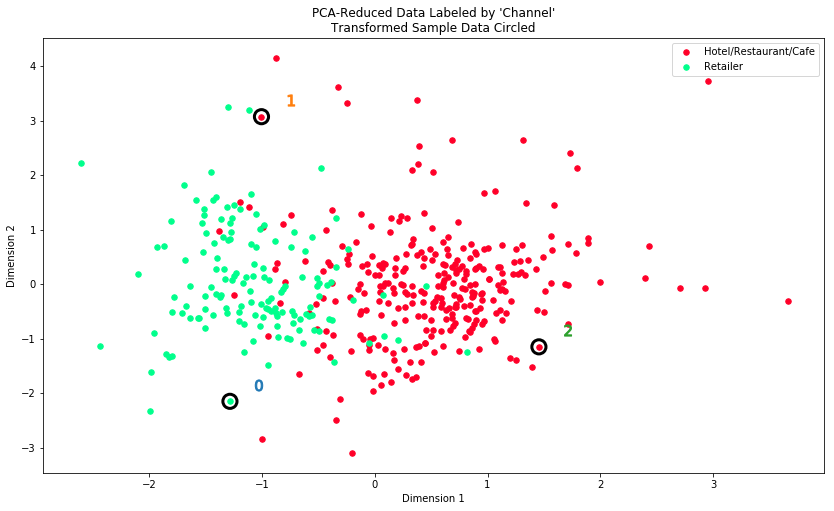

In [69]:
# Display the clustering results based on 'Channel' data
vs.channel_results(reduced_data, outliers, pca_samples)

### Question 12

* How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? 
* Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? 
* Would you consider these classifications as consistent with your previous definition of the customer segments?

**Answer:**

* Based on what I observe in the original scatter plot, the area in the middle is pretty densed with data points and really hard to distinguish clearly which area is separated from the others. The clusters made from my choice earlier seem to be right next to each other and very closely related. In another words, there's no clear boundaries or margins between different the `border points` from each clusters to another. This one with distribution of `HoReCa` and `retail` is indeed look more natural than mine, since the shape of each clusters' distribution are scattered around, not forced to be in another clusters just because they are in another clusters' area.

* Even though the areas of these two distributions are overlapped to each other, when we look at one and overlook the other, the graph does look like it still contains 2 separated areas. However, because of outliers here and there, it might be a bit confusing when it comes to making sense of each clusters' shape.

* I will still stick with my earlier choice as we at least have a a clear boundaries on which area belongs to `Segment 1`, `2` and so on. I prefer to look at it that way because that is one of KMeans algorithm advantages, hard-clustering. We know exactly which clusters the datapoints belong to, and we want to make sure we have a clear vision on our prediction by getting rid of as much outliers as possible.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.